<a href="https://colab.research.google.com/github/vennelabontha/DeepLearning/blob/main/Another_copy_of_R18_DL_Lab_Executions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Applying the Convolution Neural Network on computer vision problems**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras import Input

model = models.Sequential()

# Explicitly define the input shape using the Input layer
model.add(Input(shape=(32, 32, 3)))

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 53ms/step - accuracy: 0.3247 - loss: 1.8074 - val_accuracy: 0.5178 - val_loss: 1.3293
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 44ms/step - accuracy: 0.5416 - loss: 1.2817 - val_accuracy: 0.5910 - val_loss: 1.1364
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6072 - loss: 1.1058 - val_accuracy: 0.6092 - val_loss: 1.1137
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.6470 - loss: 1.0019 - val_accuracy: 0.6405 - val_loss: 1.0227
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6727 - loss: 0.9312 - val_accuracy: 0.6530 - val_loss: 0.9853
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.6966 - loss: 0.8632 - val_accuracy: 0.6783 - val_loss: 0.9326
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.7164 - loss: 0.8114 - val_accuracy: 0.6729 - val_loss: 0.9374
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.7296 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6972 - loss: 0.8956
Test Accuracy: 0.6944


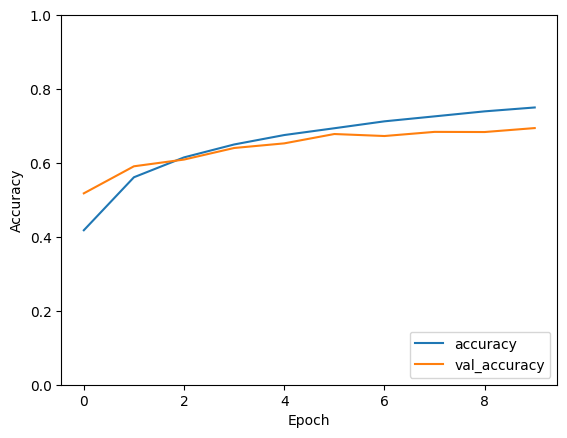

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


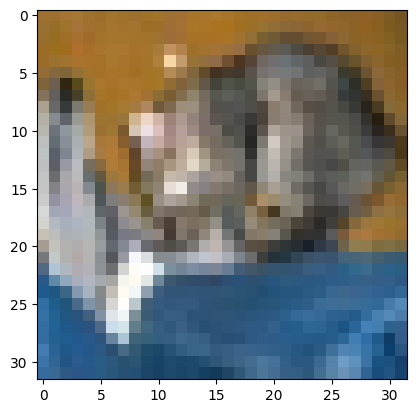

Predicted: 3, Actual: 3


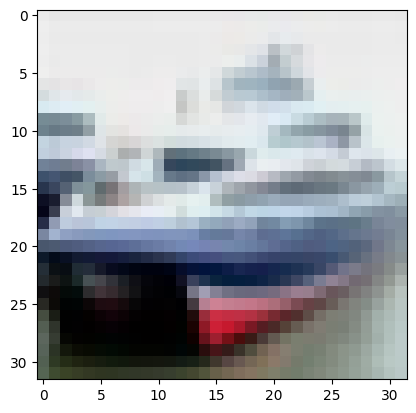

Predicted: 8, Actual: 8


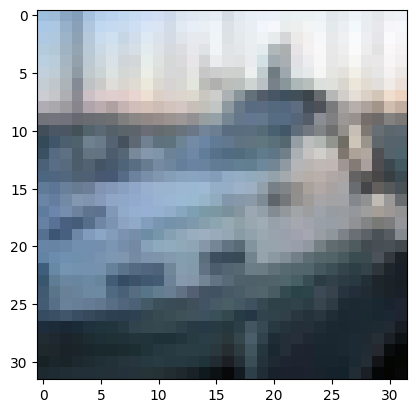

Predicted: 8, Actual: 8


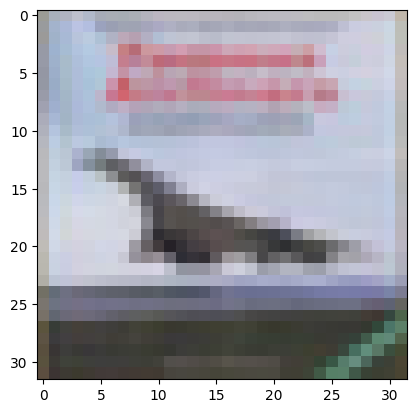

Predicted: 0, Actual: 0


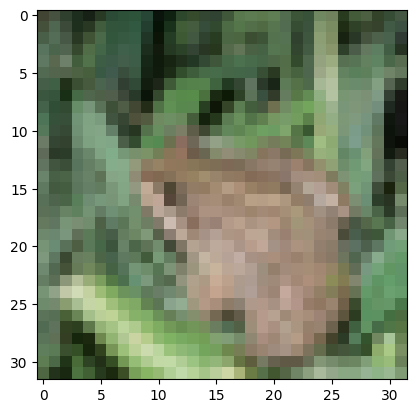

Predicted: 6, Actual: 6


In [ ]:
predictions = model.predict(x_test)

# Show the first 5 predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.show()
    print(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")

# **4. Image classification on MNIST dataset (CNN model with Fully connected layer)**

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(28, 28, 1)))

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9161 - loss: 0.2763 - val_accuracy: 0.9863 - val_loss: 0.0415
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9896 - val_loss: 0.0314
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9901 - val_loss: 0.0323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9889 - val_loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9903 - val_loss: 0.0340
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9966 - loss: 0.0097 - val_accuracy: 0.9919 - val_loss: 0.0274
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9905 - val_loss: 0.0326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9975 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
predictions = model.predict(x_test)

# Display the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()


# 5. Applying the Deep Learning Models in the field of Natural Language **Processing**

In [ ]:
!pip install tensorflow transformers


In [ ]:
from tensorflow.keras import layers, models
from transformers import BertTokenizer, TFBertModel
import numpy as np


In [ ]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)


In [ ]:
model = models.Sequential()

# Embedding layer
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))

# LSTM layer
model.add(layers.LSTM(128, return_sequences=False))

# Fully connected layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 660ms/step - accuracy: 0.7110 - loss: 0.5297 - val_accuracy: 0.8652 - val_loss: 0.3171
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 268s 675ms/step - accuracy: 0.9009 - loss: 0.2480 - val_accuracy: 0.8462 - val_loss: 0.3493
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 326s 686ms/step - accuracy: 0.9287 - loss: 0.1885 - val_accuracy: 0.8654 - val_loss: 0.3862
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 311s 656ms/step - accuracy: 0.9520 - loss: 0.1339 - val_accuracy: 0.8585 - val_loss: 0.4061
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 259s 650ms/step - accuracy: 0.9679 - loss: 0.0913 - val_accuracy: 0.8449 - val_loss: 0.4489


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sentences (use real dataset for practical cases)
source_sentences = ['I am a student', 'You are a teacher']
target_sentences = ['Je suis étudiant', 'Vous êtes professeur']

# Tokenize and pad sequences
tokenizer_source = Tokenizer()
tokenizer_source.fit_on_texts(source_sentences)
source_sequences = tokenizer_source.texts_to_sequences(source_sentences)
source_padded = pad_sequences(source_sequences, padding='post')

tokenizer_target = Tokenizer()
tokenizer_target.fit_on_texts(target_sentences)
target_sequences = tokenizer_target.texts_to_sequences(target_sentences)
target_padded = pad_sequences(target_sequences, padding='post')


In [ ]:
# Encoder
encoder_inputs = layers.Input(shape=(None,))
encoder_embedding = layers.Embedding(input_dim=10000, output_dim=128)(encoder_inputs)
encoder_lstm = layers.LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = layers.Input(shape=(None,))
decoder_embedding = layers.Embedding(input_dim=10000, output_dim=128)(decoder_inputs)
decoder_lstm = layers.LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = layers.Dense(10000, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (using real data for practical cases)
# model.fit([source_padded, target_padded], target_padded, epochs=20, batch_size=64)


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Encode input text
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Set the pad_token_id to eos_token_id to avoid warning
pad_token_id = tokenizer.eos_token_id

# Generate text with attention mask
output = model.generate(
    input_ids,
    max_length=50,
    num_return_sequences=1,
    pad_token_id=pad_token_id,
    attention_mask=torch.ones(input_ids.shape, dtype=torch.long)
)

# Decode and print the output
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example sentence for classification
sentence = "This is a great product!"

# Tokenize and encode the sentence
inputs = tokenizer(sentence, return_tensors="tf", padding=True, truncation=True, max_length=128)


In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras import layers

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define a custom Keras layer that wraps the BERT model
class BertLayer(layers.Layer):
    def __init__(self, bert_model):
        super(BertLayer, self).__init__()
        self.bert = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output.last_hidden_state, output.pooler_output

# Define Keras Input
input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name='attention_mask')

# Pass inputs through the custom BERT layer
bert_layer = BertLayer(bert_model)
last_hidden_state, pooler_output = bert_layer([input_ids, attention_mask])

# Add a dense layer for classification
output = layers.Dense(1, activation='sigmoid')(pooler_output)

# Define the complete model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Example of preparing input data for the model
sample_text = ["This is a great movie!"]
inputs = tokenizer(sample_text, padding=True, truncation=True, return_tensors='tf')

# Train the model on real data (uncomment the following line to train)
# model.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(test_data, test_labels))


#6.Train a sentiment analysis model on IMDB use RNN layers with LSTM/GRU notes


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
# Load the IMBD dataset
vocab_size=1000 #use the top 10,000 words from the dataset
max_len=200 #max length of each review
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)

#pad sequence to ensure uniform input length
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
#Define the sequential model
model=models.Sequential()
#Add an EMbedding layer (specify input_dim and output_dim)
model.add(layers.Embedding(input_dim=10000,output_dim=128,input_length=100))
# Add an LSTM layer
model.add(layers.LSTM(128))
# Add a dense layer for classification
model.add(layers.Dense(1,activation='sigmoid'))
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Build the model by passing an example input
#correctly specifying minval and maxval
example_input=tf.random.uniform((32,100),minval=0, maxval=10000,dtype=tf.int32)
model(example_input)
#Now check the summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 100, 128)              │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (32, 128)                   │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7000 - loss: 0.5565 - val_accuracy: 0.8259 - val_loss: 0.3975
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8230 - loss: 0.3969 - val_accuracy: 0.8413 - val_loss: 0.3591
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8430 - loss: 0.3599 - val_accuracy: 0.8472 - val_loss: 0.3619
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8575 - loss: 0.3332 - val_accuracy: 0.8551 - val_loss: 0.3413
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8722 - loss: 0.2984 - val_accuracy: 0.8557 - val_loss: 0.3375


In [ ]:
# Evaluate the Model
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8511 - loss: 0.3463
Test Accuracy:0.8557


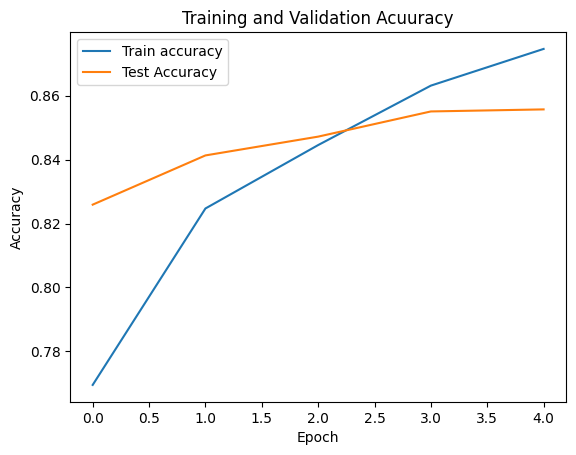

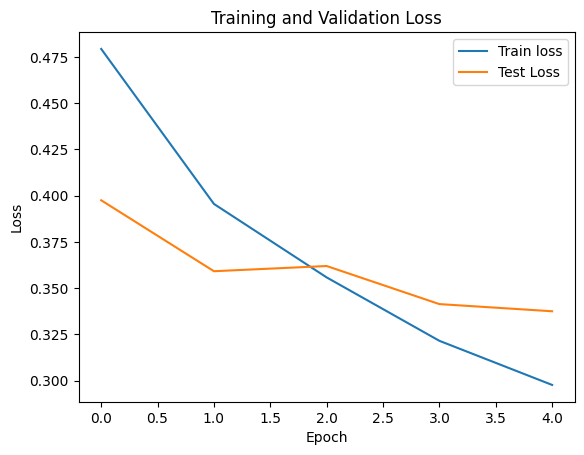

In [ ]:
import matplotlib.pyplot as plt

#plot accuracy
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.title('Training and Validation Acuuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

#Load the IMDB dataset word index
word_index=imdb.get_word_index()
#Define the new review
new_review="The movie was fantastic! I really enjoyed it."
#convert the review to a sequence of words indices
new_review_sequence=[word_index[word] for word in new_review.lower().split() if word in word_index]
#pad the sequence
max_len=100 # Define max_len according to your models input requirement
new_review_sequence_padded=pad_sequences([new_review_sequence],maxlen=max_len)
# Load your pre-trained model
#predict the sentiment
prediction=model.predict(new_review_sequence_padded)
sentiment='positive' if prediction[0]>0.5 else 'negative'
print(f"Predicted sentiment :{sentiment}")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted sentiment :positive


# 7.Applying the Autoencoder algorithm for encoding the real-world data

In [ ]:
import numpy as np
import tensorflow as tf
# Importing Module from tensorflow.keras instead of tensorflow.keras.model
from tensorflow.keras import Model # Correct import path
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

#Normalize the data to[0,1] range
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Flatten the images for input the auto encoder
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#Define the size of the encoding dimension
encoding_dim = 32
#input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
#this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional ) input
encoded_input = Input(shape=(encoding_dim,))

#Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#create the decoder  model
decoder = Model(encoded_input, decoder_layer(encoded_input))

#compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3867 - val_loss: 0.1901
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1798 - val_loss: 0.1534
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1490 - val_loss: 0.1347
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1324 - val_loss: 0.1223
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1208 - val_loss: 0.1134
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1128 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1071 - val_loss: 0.1027
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1029 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1000 - val_loss: 0.0971
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0962 - val_loss: 0.0944
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
#encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


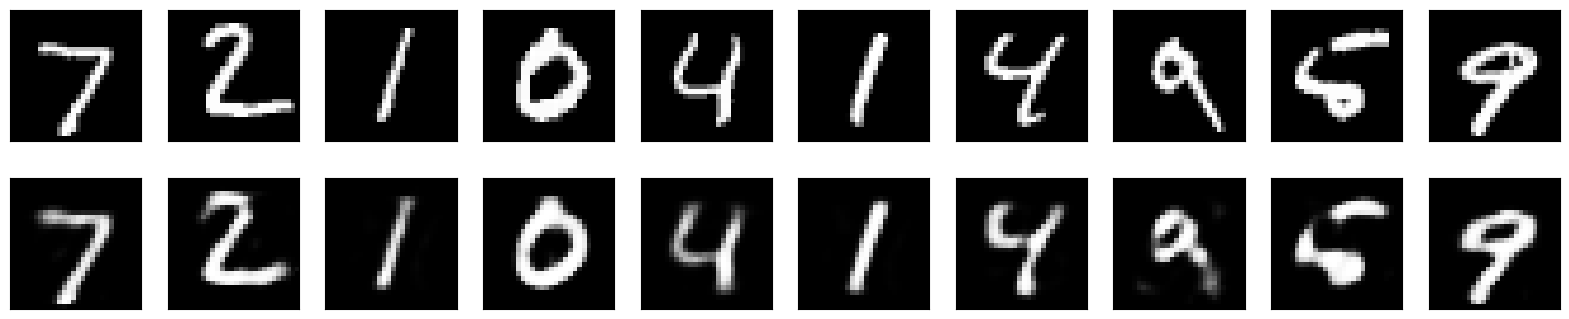

In [ ]:
n=10 #How many didgits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstruction
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# 8. Applying Generative Adversial Networks for image generation and unsepervised tasks

In [1]:
!pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
# Importing the mnist dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist  # Correct import path
import numpy as np

# load the preprocess the MNIST dataser
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, BatchNormalization,UpSampling2D,Conv2D
def Build_Generator():
  model=tf.keras.Sequential()
  model.add(Dense(128 * 7 * 7, activation="relu", input_dim=100))
  model.add(Reshape((7, 7, 128)))
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=3, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.01))
  model.add(UpSampling2D())
  model.add(Conv2D(64, kernel_size=3, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Conv2D(1, kernel_size=3, padding="same", activation="tanh"))
  return model

In [4]:
from tensorflow.keras.layers import Dropout,Flatten
def Build_Discriminator():
  model=tf.keras.Sequential()
  model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(28, 28, 1), padding="same"))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  return model

In [5]:
def compile_gan(generator, discriminator):
  discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])
  discriminator.trainable=False
  noise=tf.keras.Input(shape=(100,))
  generated_img=generator(noise)
  validity=discriminator(generated_img)
  combined=tf.keras.Model(noise,validity)
  combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))
  return combined

In [7]:
def train_gan(generator, discriminator, combined, epochs, batch_size=128, sample_interval=50):
    (x_train, _), (_, _) = mnist.load_data()
    x_train = x_train / 127.5 - 1.0
    x_train = np.expand_dims(x_train, axis=-1)

    valid = np.ones((batch_size, 1))  # Corrected 'valis' to 'valid'
    fake = np.zeros((batch_size, 1))
    for epoch in range(epochs):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, valid)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = combined.train_on_batch(noise, valid)
        print(f"{epoch + 1}/{epochs}, D Loss: {d_loss[0]}, D Acc: {100 * d_loss[1]}, G loss: {g_loss}")
        if (epoch + 1) % sample_interval == 0:
            # Pass figsize to save_images
            save_images(epoch, generator, figsize=(10, 10))

def save_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, 100))  # Corrected 'example' to 'examples'
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5

    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
    plt.close()

In [11]:
#instantiate and compile the model
generator = Build_Generator()
discriminator = Build_Discriminator()  # Changed to Build_Discriminator
combined = compile_gan(generator, discriminator)
# train the GAN
train_gan(generator, discriminator, combined, epochs=200, batch_size=128, sample_interval=100)  # Changed save_interval to sample_interval

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/200, D Loss: 0.6283947825431824, D Acc: 73.2421875, G loss: [array(0.65236616, dtype=float32), array(0.65236616, dtype=float32), array(0.50390625, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


2/200, D Loss: 0.6494048833847046, D Acc: 58.984375, G loss: [array(0.6565835, dtype=float32), array(0.6565835, dtype=float32), array(0.515625, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/200, D Loss: 0.6525566577911377, D Acc: 55.82031011581421, G loss: [array(0.6570466, dtype=float32), array(0.6570466, dtype=float32), array(0.51171875, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/200, D Loss: 0.654161810874939, D Acc: 53.87136936187744, G loss: [array(0.6574814, dtype=float32), array(0.6574814, dtype=float32), array(0.5048828, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/200, D Loss: 0.6551369428634644, D Acc: 52.69097089767456, G loss: [array(0.65787446, dtype=float32), array(0.65787446, dtype=float32), array(0.5, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/200, D Loss: 0.6558191180229187, D Acc: 52.23425626754761, G loss: [array(0.6582288, dtype=float32), array(0.6582288, dtype=float32), array(0.50065106, dtype=float32)]
4/4 ━━━━━━━━━━━